<a href="https://colab.research.google.com/github/LaylaMcD/DIGS-DP/blob/main/PCA_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from gensim.models import Word2Vec, FastText
import pandas as pd
import re

from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import plotly.graph_objects as go

import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas
import gensim
import logging
import glob, os
import nltk
from nltk import word_tokenize
from pprint import pprint
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
data_dir="/content/drive/My Drive/Colab Notebooks/output_files"
os.chdir(data_dir)

data = []
for filename in glob.glob("*.txt"):
    filedata = open(filename, 'r').read()
    data.append(filedata)

print("Number of documents: " + str(len(data)))

Number of documents: 10


In [6]:
from nltk.corpus import wordnet as wn
from gensim import corpora, models
#from contractions import CONTRACTION_MAP
import re, string
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return tokens

def pos_tag_text(text):
    # convert Penn treebank tag to wordnet tag
    def penn_to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None
    tagged_text = nltk.pos_tag(nltk.word_tokenize(text))
    #tagged_text = tag(text)
    tagged_lower_text = [(word.lower(), penn_to_wn_tags(pos_tag)) for word, pos_tag in tagged_text]
    return tagged_lower_text

def lemmatize_text(text):
    pos_tagged_text = pos_tag_text(text)
    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag else word for word, pos_tag in pos_tagged_text]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

def remove_special_characters(text):
    tokens = tokenize_text(text)
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub('', token) for token in tokens])
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

def remove_stopwords(text):
    stopword_list = nltk.corpus.stopwords.words('english')
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

def normalize_corpus(corpus, tokenize):
    normalized_corpus = []
    for text in corpus:
        text = lemmatize_text(text)
        text = remove_special_characters(text)
        text = remove_stopwords(text)
        if tokenize:
            text = tokenize_text(text)
        normalized_corpus.append(text)
    return normalized_corpus

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
norm_corpus = normalize_corpus(data, tokenize=True)

dictionary = Dictionary(norm_corpus)   # Build the dictionary

# Convert to vector corpus
vectors = [dictionary.doc2bow(text) for text in norm_corpus]

# Build TF-IDF model
tfidf = TfidfModel(vectors)

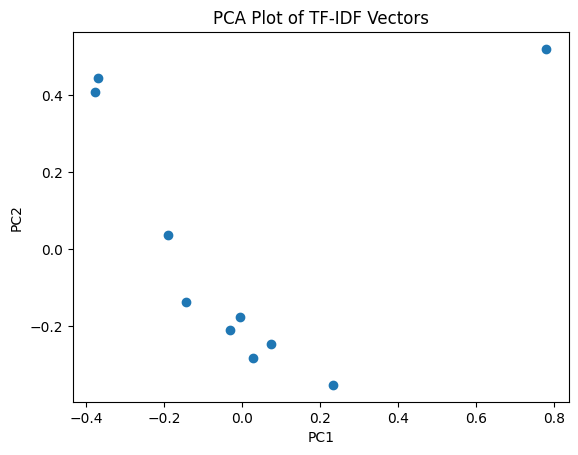

In [42]:
from gensim.matutils import corpus2dense
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dense_matrix)

# Plot PCA result
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot of TF-IDF Vectors')
plt.show()


In [31]:
X, y = pca_result[:, 0], pca_result[:, 1]

In [27]:
from sklearn.manifold import Isomap
X_reshaped = X.reshape(-1, 1)

# Apply Isomap
isomap = Isomap()
X_isomap = isomap.fit_transform(X_reshaped)

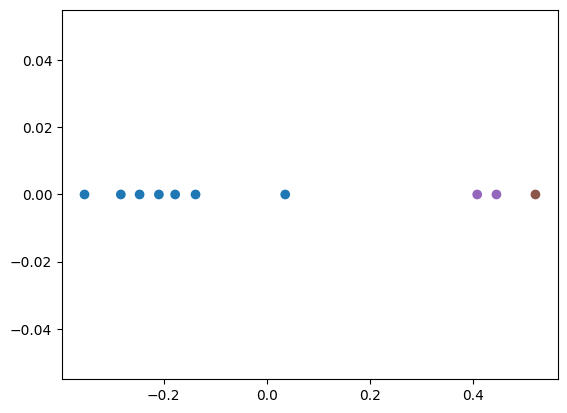

In [30]:
plt.figure()
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=plt.cm.tab10(y))

In [36]:
print(X_pca[:5])

[[0.         0.         0.00316369 ... 0.         0.         0.        ]
 [0.         0.         0.00059145 ... 0.         0.         0.        ]
 [0.         0.         0.00038543 ... 0.         0.         0.        ]
 [0.         0.         0.00111815 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


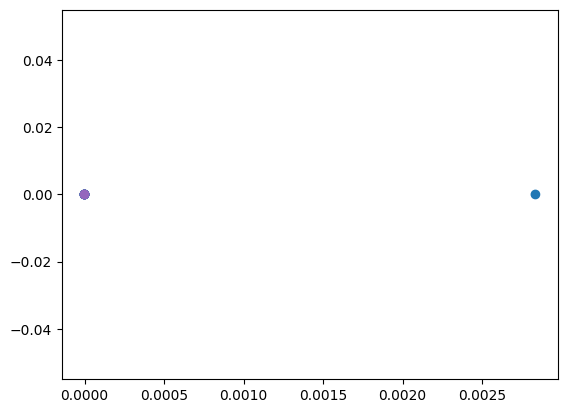

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_pca[:, -1], X_pca[:, 1], c=plt.cm.tab10(y))

In [8]:
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

tfidf_model = TfidfModel(vectors)

corpus_tfidf = tfidf_model[vectors]

In [15]:
# Perform PCA
pca = PCA(n_components=2)
##X_pca = pca.fit_transform(tfidf.toarray())

X_pca = []

for doc in corpus_tfidf:
    doc_array = [0] * len(dictionary)
    for idx, value in doc:
        doc_array[idx] = value
    X_pca.append(doc_array)

X_pca = np.array(X_pca)

In [16]:
print(X_pca.shape)

# Create DataFrame from the PCA results
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Print the DataFrame to verify
print(df_pca)

(10, 155222)
   PC1  PC2       PC3       PC4       PC5       PC6       PC7       PC8  \
0  0.0  0.0  0.003164  0.001787  0.002968  0.002968  0.020775  0.020775   
1  0.0  0.0  0.000591  0.005512  0.000000  0.000000  0.000000  0.000000   
2  0.0  0.0  0.000385  0.000239  0.000000  0.000000  0.000000  0.000000   
3  0.0  0.0  0.001118  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5  0.0  0.0  0.006245  0.000000  0.000000  0.000000  0.000000  0.000000   
6  0.0  0.0  0.000000  0.007458  0.000000  0.000000  0.000000  0.000000   
7  0.0  0.0  0.004629  0.002396  0.000000  0.000000  0.000000  0.000000   
8  0.0  0.0  0.002824  0.000000  0.000000  0.000000  0.000000  0.000000   
9  0.0  0.0  0.003023  0.000000  0.000000  0.000000  0.000000  0.000000   

        PC9      PC10  ...  PC155213  PC155214  PC155215  PC155216  PC155217  \
0  0.011871  0.011871  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
1

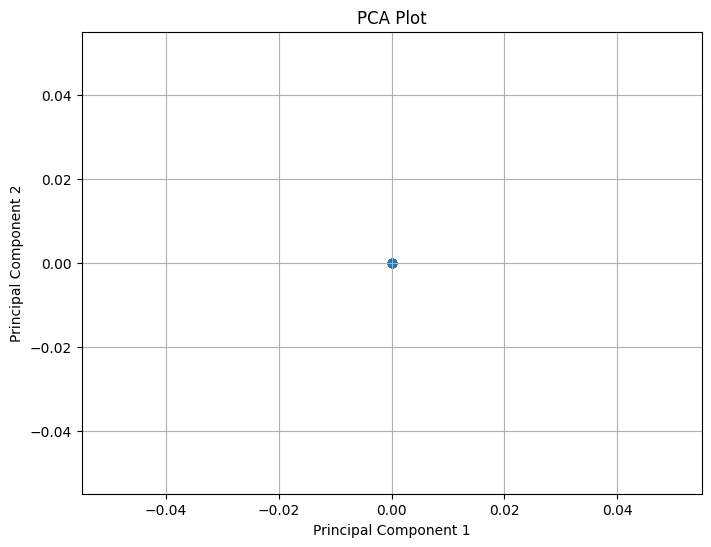

In [17]:
import matplotlib.pyplot as plt

# Data
df = pd.DataFrame(df_pca)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(df['PC1'], df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.grid(True)
plt.show()

In [43]:
# Visualize PCA results
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])

# Annotate points with document index
for i, text in enumerate(corpus):
    plt.annotate(f"Doc {i+1}", xy=(df_pca.iloc[i]['PC1'], df_pca.iloc[i]['PC2']))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Map of Vectorized Corpus')
plt.show()

ValueError: Shape of passed values is (10, 155222), indices imply (10, 2)

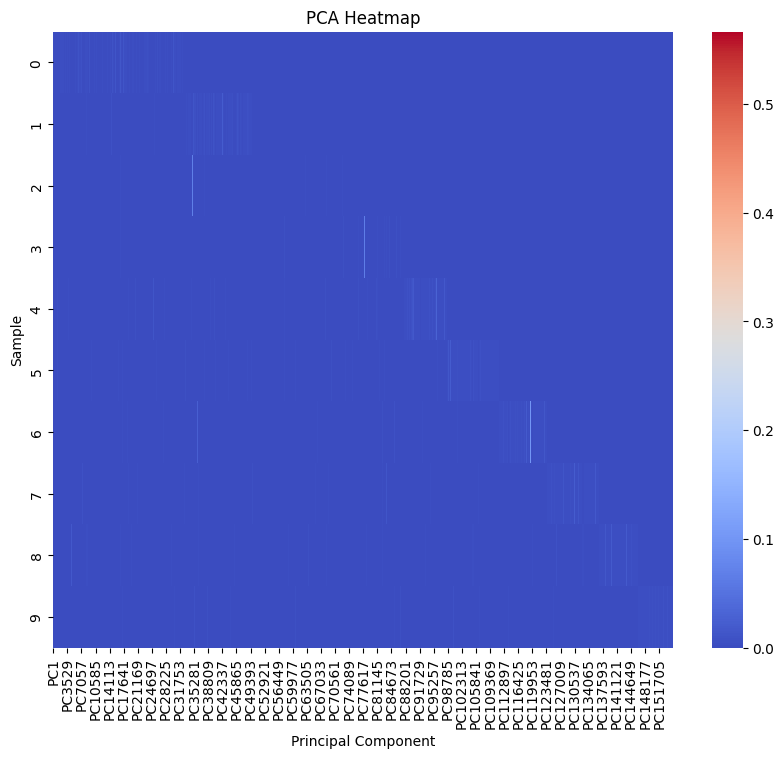

In [11]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df_pca, cmap='coolwarm')
plt.xlabel('Principal Component')
plt.ylabel('Sample')
plt.title('PCA Heatmap')
plt.show()

In [12]:
clean_txt = []
for w in range(len(df.content)):
   desc = df['content'][w].lower()

   #remove punctuation
   desc = re.sub('[^a-zA-Z]', ' ', desc)

   #remove tags
   desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)

   #remove digits and special chars
   desc=re.sub("(\\d|\\W)+"," ",desc)
   clean_txt.append(desc)

df['clean'] = clean_txt
df.head(2)

NameError: name 'df' is not defined

In [14]:
col_df = df['content']
print(col_df.head())  # This will print the first few rows of the column

NameError: name 'df' is not defined

In [9]:
corpus = []
for col in col_df:
   word_list = col.split(" ")
   corpus.append(word_list)

#show first value
corpus[0:1]

#generate vectors from corpus
model = Word2Vec(corpus, min_count=1, vector_size = 56)

In [10]:
X = model.wv[model.wv.key_to_index]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Create DataFrame from the PCA results
df_pca = pd.DataFrame(result, columns=['PC1', 'PC2'])

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])

# Annotate points with words from the vocabulary
for i, word in enumerate(model.wv.index_to_key):
    plt.annotate(word, xy=(df_pca.iloc[i]['PC1'], df_pca.iloc[i]['PC2']))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Word Embeddings')
plt.show()

ValueError: 
OFF$$?
   ^
ParseException: Expected end of text, found '$'  (at char 3), (line:1, col:4)

<Figure size 800x600 with 1 Axes>